# Technical Task

In [3]:
#Table One
import pandas as pd
tz1 = pd.DataFrame({ ' ':['Example, kE/1 turbine (baseData)','Min Max Range'], 'Turbine EXW':['2000 kE','40%'],'Transport':['1000 kE','40%'], 'Customizations':['1000 kE','40%'],'Hub activities':['500 kE','40%'],
'Hub rental':['500 kE','40%'],'Installation':['500 kE','40%'],'Commissioning':['700 kE','40%'],'Commissioning vessel':['1000 kE','40%'],'Installation vessel':['700 kE','40%']})
tz1

,,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel
0,"Example, kE/1 turbine (baseData)",2000 kE,1000 kE,1000 kE,500 kE,500 kE,500 kE,700 kE,1000 kE,700 kE
1,Min Max Range,40%,40%,40%,40%,40%,40%,40%,40%,40%


In [4]:
#Table Two
tz2 = pd.DataFrame({ ' ':['Example (baseData)','Min Max Range'], 'Wind speed':['10 m/s','±2 m/s'],'Air density':['1,12','1.1-1.3'], 'Water depth':['24 mt','0-60'],
'Country':['US','Any'],'Inflation':['2%','1-5.5']})

tz2

,,Wind speed,Air density,Water depth,Country,Inflation
0,Example (baseData),10 m/s,"1,12",24 mt,US,2%
1,Min Max Range,±2 m/s,1.1-1.3,0-60,Any,1-5.5


In [5]:
#Table Three
tz2 = pd.DataFrame({ ' ':['Example (baseData)','Min Max Range'], 'Project launch year NTP':['2021','Up to 2025'],'Installation year':['2023','Up to 2030'],
                    'Distance from shore':['30km','0-150'],'Distance from hub':['40km','0-150'],'Number of units':['46 turbines','10 to 300'],
                    'Site area':['100km','30 to 300'],'Weather':['60','1 to 100'],'Losses of production':['14%','10% to 20%']
                    })

tz2

,,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production
0,Example (baseData),2021,2023,30km,40km,46 turbines,100km,60,14%
1,Min Max Range,Up to 2025,Up to 2030,0-150,0-150,10 to 300,30 to 300,1 to 100,10% to 20%


# Data Generator

In [11]:
#header = ['','Turbine EXW','Transport','Customizations','Hub activities','Hub rental','Installation','Commissioning','Commissioning vessel','Installation vessel']

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
noise = 5

def dataGenerator(minValue,maxValue,baseData,size,type):
  dataset = []
  if type == '%':
    for i in range(0,size):
      my_randoms = round(random.uniform(minValue, maxValue),2)
      percent = my_randoms
      datainp = round((baseData * (percent/100)),2)
      data = baseData + datainp
      #print("The "+str(percent)+"% of "+str(baseData)+ " is: " + str(datainp) +" and total data "+ str(data))
      dataset.append(data)
    return dataset
  if type == 'other':
    for i in range(0,size):
      my_randoms = round(random.uniform(minValue, maxValue),2)
      data = baseData + my_randoms
      dataset.append(data)
    return dataset
  if type == 'int':
    for i in range(0,size):
      my_randoms = random.randint(minValue, maxValue)
      data = baseData + my_randoms
      dataset.append(data)
    return dataset
  if type == 'seq %':
    startData = baseData+(baseData/100*minValue)
    lastData = baseData+(baseData/100*maxValue)
    deltaData = lastData-startData
    trendSumm = deltaData/size
    seqData = startData
    for i in range(1,size+1):
      my_randoms = round(random.uniform(-noise, noise),2)
      percent = my_randoms
      datainp = round((seqData * (percent/100)),2)
      #seqData = seqData+trendSumm*i # ±5%
      data = (seqData + datainp)+trendSumm*i
      #print("The "+str(percent)+"% of "+str(baseData)+ " is: " + str(datainp) +" and total data "+ str(data))
      dataset.append(data)
    return dataset
  if type == 'GAUSS':
    if abs(minValue)==abs(maxValue):
      deviation = abs(baseData/100*minValue)
      dataset = np.random.normal(baseData,deviation/3,size)
      dataset = sorted(dataset)
    else:
      print("your deviation of the base isn't same (minValue != maxValue)")
    return dataset
  else:
    print("wrong type to generate the data")

# Table №1

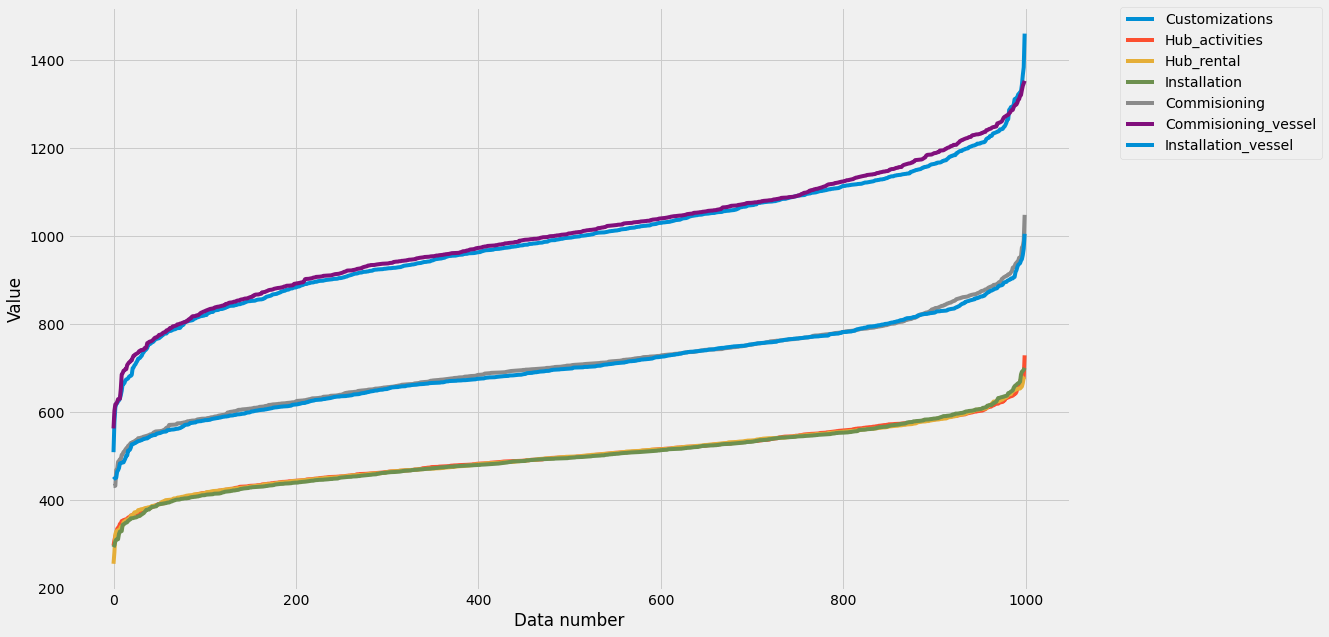

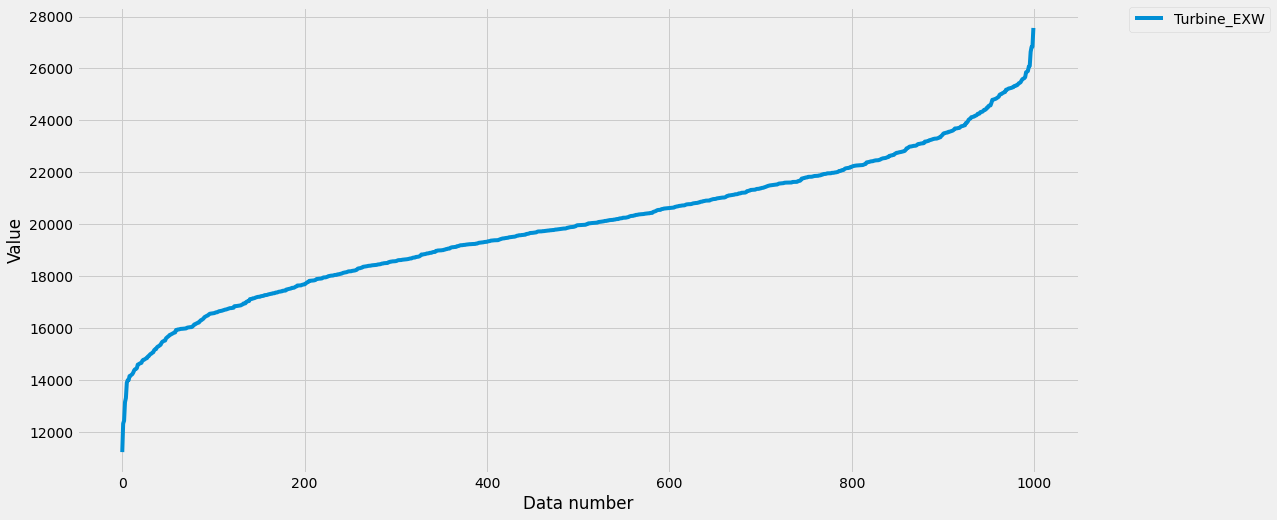

In [16]:
size = 1000
Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'GAUSS'))
Transport = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Customizations = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Hub_activities = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Hub_rental = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Installation = np.array(dataGenerator(-40,40,500,size,'GAUSS'))
Commisioning = np.array(dataGenerator(-40,40,700,size,'GAUSS'))
Commisioning_vessel = np.array(dataGenerator(-40,40,1000,size,'GAUSS'))
Installation_vessel = np.array(dataGenerator(-40,40,700,size,'GAUSS'))

plt.figure(figsize=(16,10))

plt.plot(Customizations, label="Customizations")
plt.plot(Hub_activities, label="Hub_activities")
plt.plot(Hub_rental, label="Hub_rental")
plt.plot(Installation, label="Installation")
plt.plot(Commisioning, label="Commisioning")
plt.plot(Commisioning_vessel, label="Commisioning_vessel")
plt.plot(Installation_vessel, label="Installation_vessel")



plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.figure(figsize=(16,8))
plt.plot(Turbine_EXW, label="Turbine_EXW")
plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()




In [17]:
import pandas as pd
df = pd.DataFrame({ 'ID': range(0,size), 'Turbine EXW':Turbine_EXW, 'Transport':Transport, 
                    'Customizations':Customizations,
                   'Hub activities':Hub_activities,
                   'Hub rental':Hub_rental,
                   'Installation':Installation,
                   'Commissioning':Commisioning,
                   'Commissioning vessel':Commisioning_vessel,
                   'Installation vessel':Installation_vessel
                   })

In [18]:
#
df.info()
df.to_csv ('tableOne.csv', index = False, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Turbine EXW           1000 non-null   float64
 2   Transport             1000 non-null   float64
 3   Customizations        1000 non-null   float64
 4   Hub activities        1000 non-null   float64
 5   Hub rental            1000 non-null   float64
 6   Installation          1000 non-null   float64
 7   Commissioning         1000 non-null   float64
 8   Commissioning vessel  1000 non-null   float64
 9   Installation vessel   1000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.2 KB


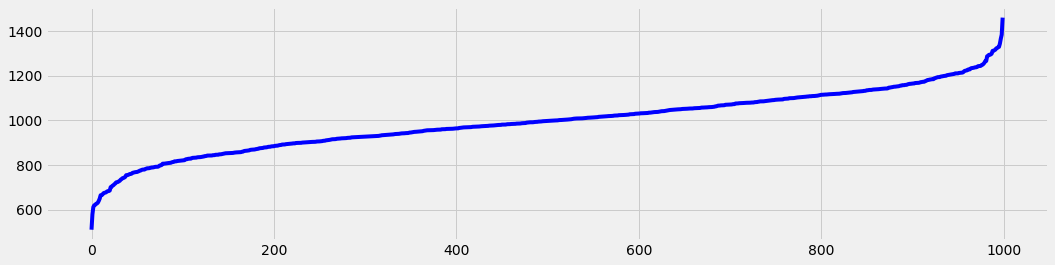

In [19]:
fig = plt.figure(figsize=(16,4))
ax = plt.axes()
ax.plot(df['ID'],df['Customizations'],color='blue')

In [20]:
dataFromCSV = pd.read_csv('tableOne.csv')
dataFromCSV

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel
0,0,11217.248845,582.513527,509.767130,297.332973,256.149952,293.906025,432.647528,563.696090,447.850892
1,1,12316.773229,598.293510,578.343933,309.630317,282.654114,298.147914,432.755922,603.701698,449.900652
2,2,12424.777764,622.567530,611.316403,318.931689,322.867474,307.233841,433.413055,618.292962,451.000116
3,3,13140.369458,658.922174,619.298346,323.594987,329.959885,311.051431,469.381791,619.835757,451.738429
4,4,13301.769927,658.961874,621.105331,335.333831,330.284355,311.769508,470.789553,623.727899,465.616773
...,...,...,...,...,...,...,...,...,...,...
995,995,26096.618998,1359.445003,1329.575577,675.336846,656.845806,686.296185,954.243362,1320.919562,944.942533
996,996,26638.162522,1359.745681,1344.275529,676.713659,658.913044,692.403327,974.593953,1332.469005,948.239251
997,997,26823.649270,1360.770113,1366.394874,677.723055,666.736897,694.437673,977.945217,1342.040566,957.949278
998,998,26839.977920,1375.851995,1384.262453,678.263934,678.987157,697.125180,990.351253,1347.743268,972.094744


# Table №2

In [23]:
countries_csv = pd.read_csv('countries.csv')
countries_csv['alpha2']

0      af
1      al
2      dz
3      ad
4      ao
       ..
188    ve
189    vn
190    ye
191    zm
192    zw
Name: alpha2, Length: 193, dtype: object

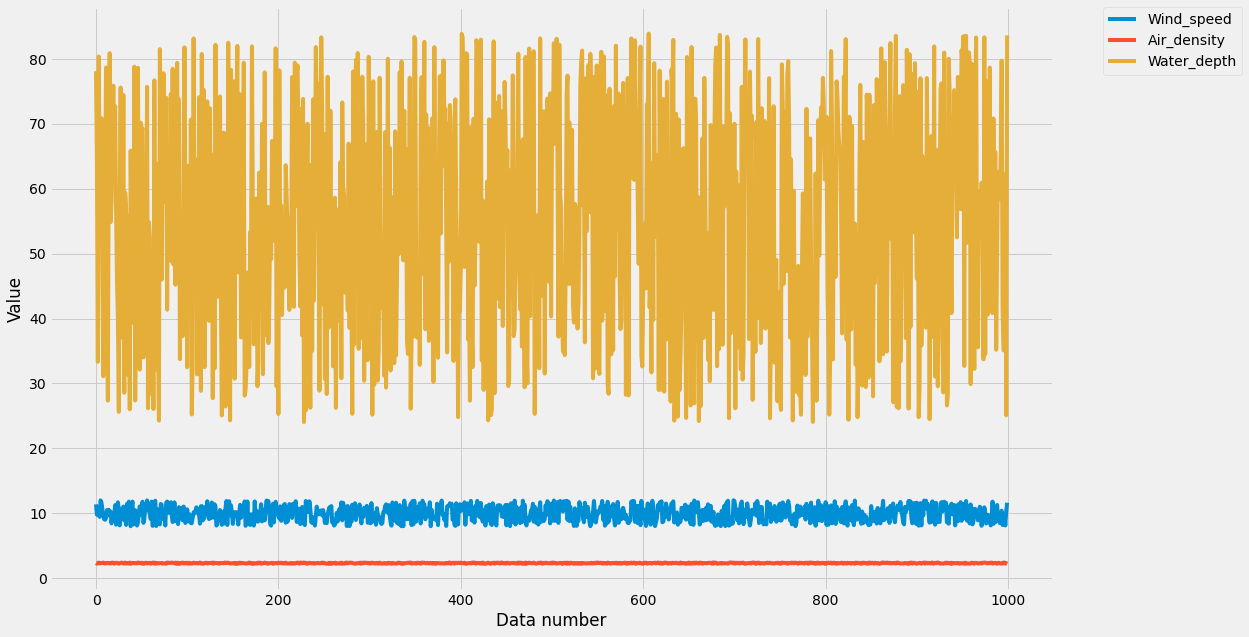

array([6.27, 4.81, 5.61, 7.21, 4.31, 6.14, 5.91, 5.14, 3.42, 4.62, 3.96,
       3.76, 5.28, 6.01, 6.61, 3.17, 6.95, 7.08, 4.84, 4.33, 7.13, 3.58,
       3.05, 7.49, 7.07, 3.86, 6.94, 5.42, 3.12, 4.37, 4.66, 5.29, 5.46,
       3.46, 3.64, 6.89, 5.37, 4.79, 3.76, 5.87, 6.05, 3.59, 4.53, 4.39,
       3.39, 5.64, 6.69, 3.11, 7.07, 7.4 , 6.2 , 7.23, 5.07, 5.68, 4.86,
       5.25, 4.06, 4.07, 4.06, 7.43, 4.99, 4.25, 6.87, 5.01, 3.15, 3.64,
       4.87, 6.94, 7.41, 3.08, 5.29, 4.65, 4.99, 7.01, 5.7 , 7.15, 5.08,
       7.16, 3.72, 4.89, 6.56, 3.33, 3.62, 6.28, 6.57, 6.68, 6.19, 6.39,
       5.51, 5.33, 5.86, 6.9 , 5.21, 3.58, 4.35, 6.75, 4.35, 7.31, 7.46,
       5.7 , 3.93, 6.71, 5.71, 7.43, 4.98, 3.07, 5.15, 4.51, 5.88, 5.69,
       5.31, 4.32, 3.55, 7.29, 5.31, 5.51, 6.51, 4.6 , 3.79, 6.74, 3.58,
       6.49, 4.63, 6.56, 7.11, 3.61, 7.19, 5.87, 3.29, 3.46, 6.51, 5.95,
       4.36, 4.75, 6.04, 6.42, 6.5 , 4.75, 4.18, 5.55, 4.59, 5.17, 5.54,
       4.7 , 5.92, 3.58, 5.04, 6.77, 4.98, 6.01, 6.

In [24]:
#Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'other'))
Wind_speed = np.array(dataGenerator(-2,2,10,size,'other'))
Air_density = np.array(dataGenerator(1.1,1.3,1.12,size,'other'))
Water_depth = np.array(dataGenerator(0,60,24,size,'other'))

plt.figure(figsize=(16,10))

plt.plot(Wind_speed, label="Wind_speed")
plt.plot(Air_density, label="Air_density")
plt.plot(Water_depth, label="Water_depth")

plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

chosen_idx = np.random.choice(192, replace = True, size = size) 
counties = countries_csv.iloc[chosen_idx] 
counties = np.array(counties['alpha2']) 

Inflation = np.array(dataGenerator(1,5.5,2,size,'other')) #For inflation data in percentage
Inflation

In [25]:
#Turbine_EXW = np.array(dataGenerator(-40,40,20000,size,'other'))
Wind_speed = np.array(dataGenerator(-2,2,10,size,'other'))
Air_density = np.array(dataGenerator(1.1,1.3,1.12,size,'other'))
Water_depth = np.array(dataGenerator(0,60,24,size,'other'))

#blob:https://stefangabos.github.io/7e77f337-47b0-4e9e-a94a-c7e38cfae5bc
chosen_idx = np.random.choice(192, replace = True, size = size) 
counties = countries_csv.iloc[chosen_idx] 
counties = np.array(counties['alpha2']) 
Inflation = np.array(dataGenerator(1,5.5,2,size,'other')) #For inflation data in percentage
Inflation

array([7.27, 7.03, 4.36, 3.8 , 6.43, 4.76, 7.4 , 3.87, 7.37, 4.75, 4.74,
       4.44, 3.12, 5.91, 3.86, 7.35, 6.43, 5.11, 4.35, 3.57, 5.38, 4.94,
       4.27, 7.22, 5.22, 5.44, 5.2 , 7.  , 5.06, 7.22, 4.57, 6.72, 6.48,
       5.68, 4.73, 7.2 , 3.15, 5.55, 3.08, 5.3 , 5.62, 6.83, 5.68, 3.25,
       3.7 , 4.44, 5.73, 3.68, 3.41, 4.12, 3.99, 4.28, 3.37, 3.3 , 4.88,
       4.17, 5.11, 3.84, 4.28, 4.08, 5.36, 5.5 , 4.48, 3.43, 6.36, 7.37,
       3.83, 6.56, 6.17, 4.51, 5.28, 7.39, 5.77, 6.6 , 5.36, 6.18, 5.68,
       5.  , 3.56, 5.64, 5.66, 6.35, 6.07, 7.43, 6.46, 4.38, 6.15, 4.54,
       3.24, 4.5 , 5.69, 6.82, 5.13, 5.75, 5.21, 3.11, 6.28, 6.  , 6.05,
       6.41, 5.09, 6.45, 4.21, 7.12, 7.47, 5.88, 3.49, 4.07, 6.39, 6.16,
       4.78, 6.85, 4.62, 7.12, 4.09, 5.32, 4.77, 4.59, 3.79, 6.67, 3.38,
       4.55, 5.47, 4.88, 4.91, 6.47, 4.7 , 4.85, 5.48, 6.16, 4.93, 3.55,
       4.7 , 5.34, 7.44, 4.17, 6.31, 7.32, 7.24, 7.12, 6.88, 3.05, 5.33,
       6.07, 6.88, 6.06, 6.71, 7.5 , 6.01, 3.46, 5.

In [26]:
df2 = pd.DataFrame({ 'ID': range(0,size), 'Wind speed':Wind_speed, 'Air density':Air_density, 
                    'Water depth':Water_depth,
                   'Country':counties,
                   'Inflation':Inflation
                   })
#df2["Country"].value_counts()
print(len(df2[df2['Country'] == 'us']))

#save csv of table 2
df2.to_csv ('tableTwo.csv', index = False, header=True)

3


# Table №3

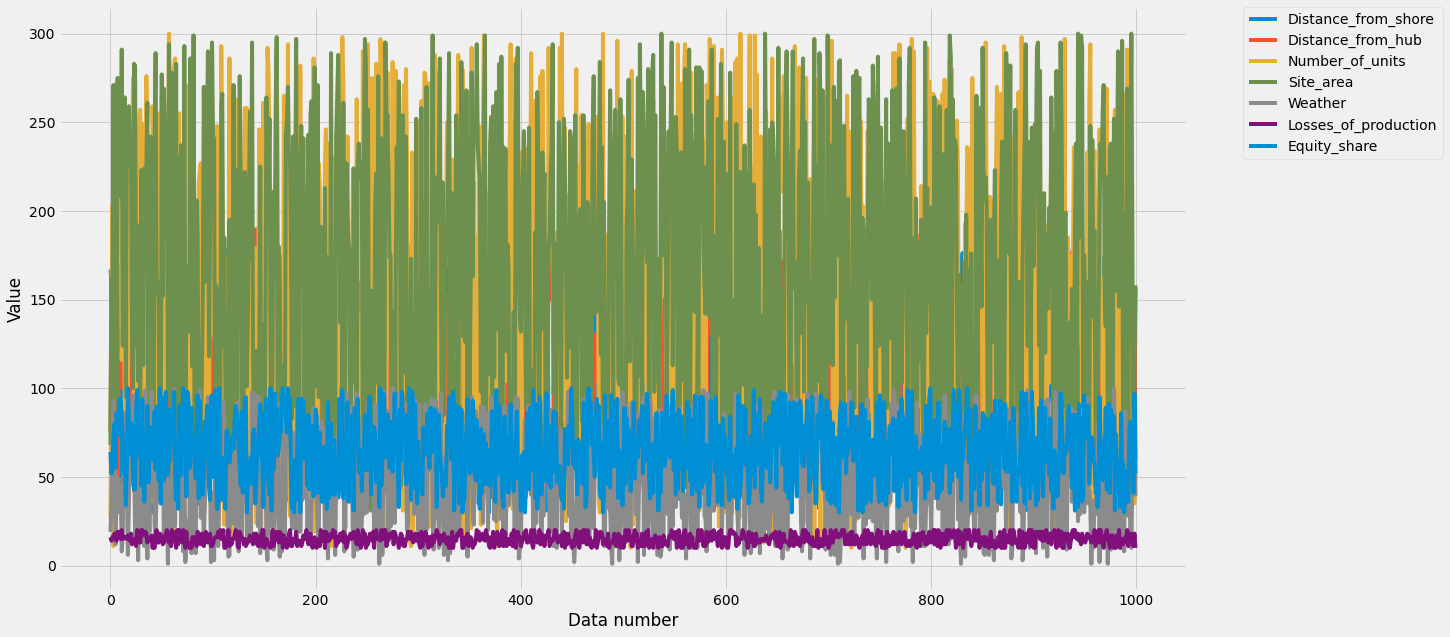

In [27]:
Project_launch_year_NTP = np.array(dataGenerator(0,4,2021,size,'int')) #year up to 2025
Installation_year = np.array(dataGenerator(0,7,2023,size,'int')) #year up to 2030

Distance_from_shore = np.array(dataGenerator(0,150,30,size,'other')) #up to 2030
Distance_from_hub = np.array(dataGenerator(0,150,40,size,'other')) #up to 2030

Number_of_units = np.array(dataGenerator(10,300,0,size,'int')) # base equal to 0 bz it start from 10 to 300
Site_area = np.array(dataGenerator(30,300,0,size,'int'))
Weather = np.array(dataGenerator(1,100,0,size,'int'))
Losses_of_production = np.array(dataGenerator(10,20,0,size,'int')) #percentage
Equity_share = np.array(dataGenerator(30,100,0,size,'int')) 

plt.figure(figsize=(18,10))


plt.plot(Distance_from_shore, label="Distance_from_shore")
plt.plot(Distance_from_hub, label="Distance_from_hub")

plt.plot(Number_of_units, label="Number_of_units")
plt.plot(Site_area, label="Site_area")
plt.plot(Weather, label="Weather")
plt.plot(Losses_of_production, label="Losses_of_production")
plt.plot(Equity_share, label="Equity_share")



plt.ylabel('Value')
plt.xlabel('Data number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()



In [28]:
df3 = pd.DataFrame({ 'ID': range(0,size), 'Project launch year NTP':Project_launch_year_NTP, 'Installation year':Installation_year, 
                    'Distance from shore':Distance_from_shore,
                   'Distance from hub':Distance_from_hub,
                   'Number of units':Number_of_units,
                   'Site area':Site_area,
                   'Weather':Weather,
                   'Losses of production':Losses_of_production,
                   'Equity share':Equity_share
                   })
df3


,ID,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,2024,2026,166.86,75.13,27,68,19,16,64
1,1,2024,2029,160.81,166.57,136,162,36,14,52
2,2,2024,2026,119.90,98.64,203,156,67,16,58
3,3,2024,2026,132.16,139.64,11,271,93,17,73
4,4,2023,2030,30.75,154.86,36,92,60,18,80
...,...,...,...,...,...,...,...,...,...,...
995,995,2022,2029,123.19,73.37,222,300,10,18,61
996,996,2024,2023,49.30,65.69,110,183,50,15,76
997,997,2023,2024,96.79,88.64,41,52,84,11,41
998,998,2022,2027,143.06,57.43,35,110,96,18,97


In [29]:
df3.to_csv ('tableThree.csv', index = False, header=True)

In [30]:
df3

,ID,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,2024,2026,166.86,75.13,27,68,19,16,64
1,1,2024,2029,160.81,166.57,136,162,36,14,52
2,2,2024,2026,119.90,98.64,203,156,67,16,58
3,3,2024,2026,132.16,139.64,11,271,93,17,73
4,4,2023,2030,30.75,154.86,36,92,60,18,80
...,...,...,...,...,...,...,...,...,...,...
995,995,2022,2029,123.19,73.37,222,300,10,18,61
996,996,2024,2023,49.30,65.69,110,183,50,15,76
997,997,2023,2024,96.79,88.64,41,52,84,11,41
998,998,2022,2027,143.06,57.43,35,110,96,18,97


# Combine tables

In [31]:
df2 = df2.drop(columns=['ID'])
df3 = df3.drop(columns=['ID'])
finaldf = pd.concat([df, df2, df3], axis=1)
finaldf

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,11217.248845,582.513527,509.767130,297.332973,256.149952,293.906025,432.647528,563.696090,447.850892,8.95,2.24,79.77,ru,7.27,2024,2026,166.86,75.13,27,68,19,16,64
1,1,12316.773229,598.293510,578.343933,309.630317,282.654114,298.147914,432.755922,603.701698,449.900652,9.59,2.41,45.91,de,7.03,2024,2029,160.81,166.57,136,162,36,14,52
2,2,12424.777764,622.567530,611.316403,318.931689,322.867474,307.233841,433.413055,618.292962,451.000116,8.29,2.42,40.88,sa,4.36,2024,2026,119.90,98.64,203,156,67,16,58
3,3,13140.369458,658.922174,619.298346,323.594987,329.959885,311.051431,469.381791,619.835757,451.738429,10.52,2.35,51.07,ly,3.80,2024,2026,132.16,139.64,11,271,93,17,73
4,4,13301.769927,658.961874,621.105331,335.333831,330.284355,311.769508,470.789553,623.727899,465.616773,11.93,2.40,65.26,et,6.43,2023,2030,30.75,154.86,36,92,60,18,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26096.618998,1359.445003,1329.575577,675.336846,656.845806,686.296185,954.243362,1320.919562,944.942533,9.73,2.37,35.39,do,3.47,2022,2029,123.19,73.37,222,300,10,18,61
996,996,26638.162522,1359.745681,1344.275529,676.713659,658.913044,692.403327,974.593953,1332.469005,948.239251,9.52,2.38,60.17,ne,7.49,2024,2023,49.30,65.69,110,183,50,15,76
997,997,26823.649270,1360.770113,1366.394874,677.723055,666.736897,694.437673,977.945217,1342.040566,957.949278,8.53,2.27,71.06,mr,3.54,2023,2024,96.79,88.64,41,52,84,11,41
998,998,26839.977920,1375.851995,1384.262453,678.263934,678.987157,697.125180,990.351253,1347.743268,972.094744,9.60,2.41,32.50,bg,4.82,2022,2027,143.06,57.43,35,110,96,18,97


In [32]:
finaldf.to_csv ('combinedtables.csv', index = False, header=True)

In [33]:
finaldf

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share
0,0,11217.248845,582.513527,509.767130,297.332973,256.149952,293.906025,432.647528,563.696090,447.850892,8.95,2.24,79.77,ru,7.27,2024,2026,166.86,75.13,27,68,19,16,64
1,1,12316.773229,598.293510,578.343933,309.630317,282.654114,298.147914,432.755922,603.701698,449.900652,9.59,2.41,45.91,de,7.03,2024,2029,160.81,166.57,136,162,36,14,52
2,2,12424.777764,622.567530,611.316403,318.931689,322.867474,307.233841,433.413055,618.292962,451.000116,8.29,2.42,40.88,sa,4.36,2024,2026,119.90,98.64,203,156,67,16,58
3,3,13140.369458,658.922174,619.298346,323.594987,329.959885,311.051431,469.381791,619.835757,451.738429,10.52,2.35,51.07,ly,3.80,2024,2026,132.16,139.64,11,271,93,17,73
4,4,13301.769927,658.961874,621.105331,335.333831,330.284355,311.769508,470.789553,623.727899,465.616773,11.93,2.40,65.26,et,6.43,2023,2030,30.75,154.86,36,92,60,18,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26096.618998,1359.445003,1329.575577,675.336846,656.845806,686.296185,954.243362,1320.919562,944.942533,9.73,2.37,35.39,do,3.47,2022,2029,123.19,73.37,222,300,10,18,61
996,996,26638.162522,1359.745681,1344.275529,676.713659,658.913044,692.403327,974.593953,1332.469005,948.239251,9.52,2.38,60.17,ne,7.49,2024,2023,49.30,65.69,110,183,50,15,76
997,997,26823.649270,1360.770113,1366.394874,677.723055,666.736897,694.437673,977.945217,1342.040566,957.949278,8.53,2.27,71.06,mr,3.54,2023,2024,96.79,88.64,41,52,84,11,41
998,998,26839.977920,1375.851995,1384.262453,678.263934,678.987157,697.125180,990.351253,1347.743268,972.094744,9.60,2.41,32.50,bg,4.82,2022,2027,143.06,57.43,35,110,96,18,97


In [34]:
#RESULT OF PREDICTION IN DataIKU
RESULTS = pd.DataFrame({ 'evs':['0.99'], 'mae':['233.92'],'mse':['74679.59'], 'mape':['0.012'],'rmse ':['273.27'],
'rmsle':['0.014'],'r2':['0.99'],'pearson':['0.99']})
RESULTS

,evs,mae,mse,mape,rmse,rmsle,r2,pearson
0,0.99,233.92,74679.59,0.012,273.27,0.014,0.99,0.99


# Prediction in Colab

data: 1000
data for train: 800


<function matplotlib.pyplot.show>

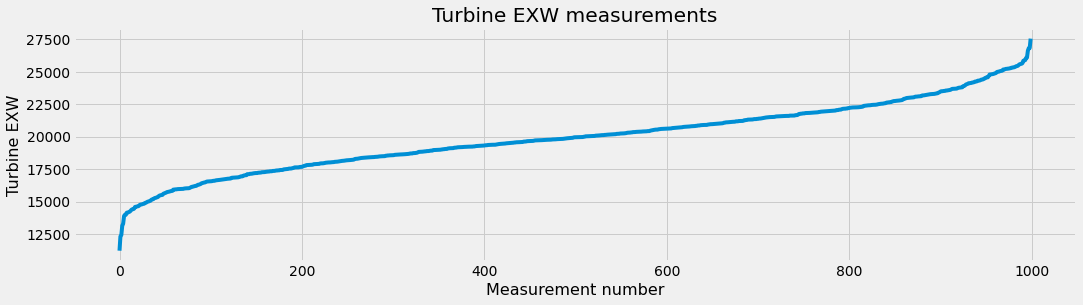

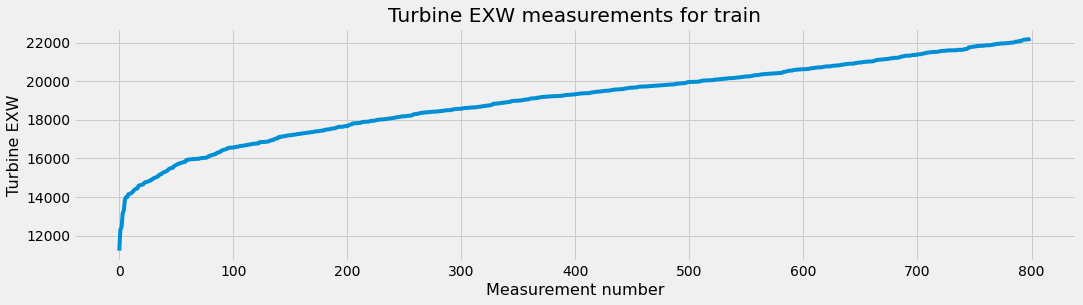

In [35]:
data = finaldf
plt.figure(figsize=(16,4))
plt.title('Turbine EXW measurements')
plt.plot(data['Turbine EXW'])
plt.xlabel('Measurement number', fontsize=16)
plt.ylabel('Turbine EXW', fontsize=16)
plt.show


x=int(len(data)*0.8)
print("data:",len(data))
print("data for train:",x)
plt.figure(figsize=(16,4))
plt.title('Turbine EXW measurements for train')
plt.plot(data['Turbine EXW'][:x])
plt.xlabel('Measurement number', fontsize=16)
plt.ylabel('Turbine EXW', fontsize=16)
plt.show

In [36]:
import math
data_cut = data.filter(['Turbine EXW'])
print(data_cut)
dataset = data_cut.values
dataset
#training_data_len = len(dataset)
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

      Turbine EXW
0    11217.248845
1    12316.773229
2    12424.777764
3    13140.369458
4    13301.769927
..            ...
995  26096.618998
996  26638.162522
997  26823.649270
998  26839.977920
999  27559.488815

[1000 rows x 1 columns]


800

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [38]:
train_data = scaled_data[0:training_data_len,:]
print(len(train_data))
print('train_data', train_data)
x_train = []
y_train = []

for i in range(60, len(train_data)):
  
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print('x_train with a length:', len(x_train),'\n',x_train)
    print(len(y_train))

800
train_data [[0.        ]
 [0.06728113]
 [0.07389005]
 [0.11767791]
 [0.12755418]
 [0.16365212]
 [0.16962757]
 [0.16963422]
 [0.17928447]
 [0.18006749]
 [0.18206069]
 [0.1836837 ]
 [0.18730664]
 [0.1924139 ]
 [0.19529979]
 [0.19598385]
 [0.19790271]
 [0.20620913]
 [0.2072549 ]
 [0.2086572 ]
 [0.20948627]
 [0.21038619]
 [0.21523264]
 [0.21754082]
 [0.21781086]
 [0.21929506]
 [0.22079561]
 [0.22138013]
 [0.22531886]
 [0.22619754]
 [0.22910064]
 [0.23131056]
 [0.23221885]
 [0.23436966]
 [0.23539932]
 [0.24039717]
 [0.24232335]
 [0.24271811]
 [0.24675446]
 [0.24879294]
 [0.24960059]
 [0.25163944]
 [0.25277304]
 [0.25734373]
 [0.26017884]
 [0.26134232]
 [0.26255023]
 [0.26299027]
 [0.26827251]
 [0.27027667]
 [0.27204949]
 [0.27363059]
 [0.27622518]
 [0.27692344]
 [0.27806223]
 [0.27949112]
 [0.28046398]
 [0.28175002]
 [0.28210573]
 [0.28800563]
 [0.28803037]
 [0.2891363 ]
 [0.28914707]
 [0.28986568]
 [0.29043224]
 [0.29051839]
 [0.29072733]
 [0.29099627]
 [0.29118995]
 [0.29151996]
 [0.2

In [39]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [40]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(740, 60, 1)

In [41]:
pip install seq2seq-lstm

  Created wheel for seq2seq-lstm: filename=seq2seq_lstm-0.1.4-cp37-none-any.whl size=14626 sha256=d28848ee8fba697b6550dbd07ece09f66b47fd789cd26b5975667bf1e1df66d5
  Stored in directory: /root/.cache/pip/wheels/22/fb/c9/c48f5b1e28e2ee101b3880f8a472d8f85f5681dac84449aedb
Successfully built seq2seq-lstm


In [42]:
from keras.models import Sequential
from keras.layers import Dense,LSTM



model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
#train the model
model.fit(x_train,y_train,batch_size=1, epochs=10)

Epoch 1/10
740/740 [==============================] - 17s 19ms/step - loss: 0.0091
Epoch 2/10
740/740 [==============================] - 15s 20ms/step - loss: 1.0419e-05
Epoch 3/10
740/740 [==============================] - 15s 20ms/step - loss: 2.4360e-05
Epoch 4/10
740/740 [==============================] - 15s 20ms/step - loss: 1.5997e-05
Epoch 5/10
740/740 [==============================] - 15s 20ms/step - loss: 5.8836e-05
Epoch 6/10
740/740 [==============================] - 14s 19ms/step - loss: 1.5291e-05
Epoch 7/10
740/740 [==============================] - 15s 20ms/step - loss: 4.9722e-05
Epoch 8/10
740/740 [==============================] - 15s 20ms/step - loss: 3.4055e-05
Epoch 9/10
740/740 [==============================] - 15s 20ms/step - loss: 4.0766e-05
Epoch 10/10
740/740 [==============================] - 14s 19ms/step - loss: 8.0817e-05


In [45]:
#create the testing data set
#create a new array containing scaled values from 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [46]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [47]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [48]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [49]:
#Evaluete the model 
#RMSE (Root mean squarred error)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

260.01402116269384

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


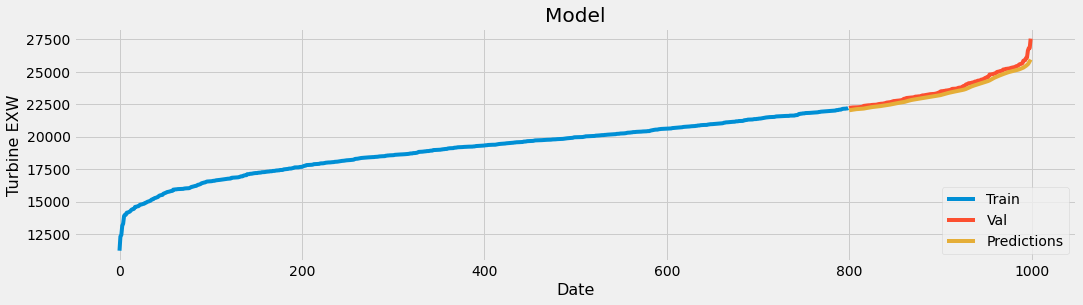

In [50]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,4))
plt.title('Model')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Turbine EXW',fontsize=16)
plt.plot(train['Turbine EXW'])
plt.plot(valid[['Turbine EXW','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [51]:
valid

,ID,Turbine EXW,Transport,Customizations,Hub activities,Hub rental,Installation,Commissioning,Commissioning vessel,Installation vessel,Wind speed,Air density,Water depth,Country,Inflation,Project launch year NTP,Installation year,Distance from shore,Distance from hub,Number of units,Site area,Weather,Losses of production,Equity share,Predictions
800,800,22212.824665,1115.433031,1114.536577,559.213440,556.275452,553.828001,782.985621,1124.539925,782.669845,9.75,2.30,39.83,ar,7.03,2025,2024,108.78,41.73,58,105,16,17,62,22038.464844
801,801,22232.505599,1115.892335,1114.646158,559.349071,556.533040,554.226828,783.309186,1125.648875,782.681102,8.02,2.41,47.20,cv,3.60,2025,2026,79.41,158.32,48,75,72,15,54,22050.158203
802,802,22242.153166,1116.834808,1114.702947,559.751091,556.571855,554.479417,783.379491,1125.731591,782.811231,8.72,2.34,51.58,rw,6.59,2025,2030,113.50,177.09,266,129,38,20,59,22062.445312
803,803,22248.557134,1116.930398,1115.277636,559.820026,556.726868,554.512780,784.259128,1126.693805,782.907062,8.73,2.29,40.29,so,6.55,2024,2025,43.44,81.04,138,264,68,12,48,22074.765625
804,804,22255.784086,1117.001528,1115.805017,559.844031,556.745361,554.514243,784.433116,1127.619747,782.981709,8.66,2.29,75.80,id,6.95,2024,2025,63.34,88.22,95,213,80,20,82,22086.636719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,26096.618998,1359.445003,1329.575577,675.336846,656.845806,686.296185,954.243362,1320.919562,944.942533,9.73,2.37,35.39,do,3.47,2022,2029,123.19,73.37,222,300,10,18,61,25526.416016
996,996,26638.162522,1359.745681,1344.275529,676.713659,658.913044,692.403327,974.593953,1332.469005,948.239251,9.52,2.38,60.17,ne,7.49,2024,2023,49.30,65.69,110,183,50,15,76,25587.654297
997,997,26823.649270,1360.770113,1366.394874,677.723055,666.736897,694.437673,977.945217,1342.040566,957.949278,8.53,2.27,71.06,mr,3.54,2023,2024,96.79,88.64,41,52,84,11,41,25691.093750
998,998,26839.977920,1375.851995,1384.262453,678.263934,678.987157,697.125180,990.351253,1347.743268,972.094744,9.60,2.41,32.50,bg,4.82,2022,2027,143.06,57.43,35,110,96,18,97,25819.105469
